In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

In [2]:
# Load the data, starting with the advanced metrics and the player totals.

nba_metrics = pd.read_csv("data/advanced.csv")
nba_totals = pd.read_csv("data/Player Totals.csv")
nba_df = pd.DataFrame(nba_totals)
metrics_df = pd.DataFrame(nba_metrics)


nba_df.head()
metrics_df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,5.5,15.2,0.7,0.3,1.1,0.084,-0.4,-1.7,-2.1,0.0
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,9.6,20.0,0.0,0.3,0.2,0.036,-3.1,-1.5,-4.6,-0.2
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,11.3,17.3,-0.4,0.0,-0.4,-0.120,-6.0,-3.5,-9.6,-0.3
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,11.2,17.8,4.5,2.6,7.1,0.148,1.2,0.1,1.3,1.9
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,10.6,16.7,1.3,1.2,2.5,0.094,-1.8,0.3,-1.5,0.2


In [3]:
nba_df['index'] = range(1, len(nba_df) + 1)
print(nba_df.columns)
metrics_df['index'] = range(1, len(metrics_df) + 1)
print(metrics_df.columns)

# Drop the redundant columns
metrics_df=metrics_df.drop(['seas_id','player_id','birth_year','pos','age','lg','tm','g','mp','x3p_ar','f_tr'], axis=1)

# Merge the two dataframes on the index column
nba_df = pd.merge(nba_df, metrics_df, on='index')
print(nba_df.columns)

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'index'],
      dtype='object')
Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'mp', 'per', 'ts_percent', 'x3p_ar',
       'f_tr', 'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent',
       'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows',
       'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'index'],
      dtype='object')
Index(['seas_id', 'season_x', 'player_id', 'player_x', 'birth_year', 'pos',
       'age', 'experience_x', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_perce

#### Feature Engineering

In [4]:
# Let's make some per game stats
nba_df['pts_per_game'] = nba_df['pts'] / nba_df['g']
nba_df['ast_per_game'] = nba_df['ast'] / nba_df['g']
nba_df['trb_per_game'] = nba_df['trb'] / nba_df['g']
nba_df['blk_per_game'] = nba_df['blk'] / nba_df['g']
nba_df['stl_per_game'] = nba_df['stl'] / nba_df['g']
nba_df['tov_per_game'] = nba_df['tov'] / nba_df['g']
nba_df['pf_per_game'] = nba_df['pf'] / nba_df['g']
nba_df['fg_per_game'] = nba_df['fg'] / nba_df['g']
nba_df['fga_per_game'] = nba_df['fga'] / nba_df['g']
# nba_df['fg3_per_game'] = nba_df['fg3'] / nba_df['g']
# nba_df['fg3a_per_game'] = nba_df['fg3a'] / nba_df['g']
nba_df['ft_per_game'] = nba_df['ft'] / nba_df['g']
nba_df['fta_per_game'] = nba_df['fta'] / nba_df['g']
nba_df['orb_per_game'] = nba_df['orb'] / nba_df['g']
nba_df['drb_per_game'] = nba_df['drb'] / nba_df['g']

print(nba_df.columns)

Index(['seas_id', 'season_x', 'player_id', 'player_x', 'birth_year', 'pos',
       'age', 'experience_x', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'index', 'season_y',
       'player_y', 'experience_y', 'per', 'ts_percent', 'orb_percent',
       'drb_percent', 'trb_percent', 'ast_percent', 'stl_percent',
       'blk_percent', 'tov_percent', 'usg_percent', 'ows', 'dws', 'ws',
       'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'pts_per_game', 'ast_per_game',
       'trb_per_game', 'blk_per_game', 'stl_per_game', 'tov_per_game',
       'pf_per_game', 'fg_per_game', 'fga_per_game', 'ft_per_game',
       'fta_per_game', 'orb_per_game', 'drb_per_game'],
      dtype='object')


In [5]:
# Filter the DataFrame for Shooting Guards (SG)
sg_df = nba_df[nba_df['pos'] == 'SG']

# limit the dataframe to just the 2024 season
sg_df = sg_df[sg_df['season_x'] == 2024]

# Display all column names
print(sg_df.columns)

# Sort the filtered DataFrame by 'usg_percent' in descending order
SG_bypts = sg_df.sort_values(by='pts_per_game', ascending=False)

# Display the sorted DataFrame
SG_bypts.head()

Index(['seas_id', 'season_x', 'player_id', 'player_x', 'birth_year', 'pos',
       'age', 'experience_x', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'index', 'season_y',
       'player_y', 'experience_y', 'per', 'ts_percent', 'orb_percent',
       'drb_percent', 'trb_percent', 'ast_percent', 'stl_percent',
       'blk_percent', 'tov_percent', 'usg_percent', 'ows', 'dws', 'ws',
       'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'pts_per_game', 'ast_per_game',
       'trb_per_game', 'blk_per_game', 'stl_per_game', 'tov_per_game',
       'pf_per_game', 'fg_per_game', 'fga_per_game', 'ft_per_game',
       'fta_per_game', 'orb_per_game', 'drb_per_game'],
      dtype='object')


,seas_id,season_x,player_id,player_x,birth_year,pos,age,experience_x,lg,tm,...,blk_per_game,stl_per_game,tov_per_game,pf_per_game,fg_per_game,fga_per_game,ft_per_game,fta_per_game,orb_per_game,drb_per_game
186,31322,2024,4495,Donovan Mitchell,NaN,SG,27.0,7,NBA,CLE,...,0.545455,1.836364,2.800000,2.145455,9.145455,19.800000,5.000000,5.781818,0.836364,4.254545
35,31171,2024,4808,Anthony Edwards,NaN,SG,22.0,4,NBA,MIN,...,0.531646,1.278481,3.050633,1.784810,9.088608,19.721519,5.354430,6.405063,0.658228,4.784810
441,31577,2024,4037,Kyrie Irving,NaN,SG,31.0,13,NBA,DAL,...,0.482759,1.275862,1.827586,1.931034,9.689655,19.500000,3.275862,3.620690,0.758621,4.241379
177,31313,2024,4824,Desmond Bane,NaN,SG,25.0,4,NBA,MEM,...,0.523810,1.023810,2.666667,2.857143,8.571429,18.476190,3.333333,3.833333,0.857143,3.547619
665,31801,2024,4366,Terry Rozier,NaN,SG,29.0,9,NBA,CHO,...,0.400000,1.066667,2.166667,1.733333,8.400000,18.300000,3.633333,4.300000,0.566667,3.333333


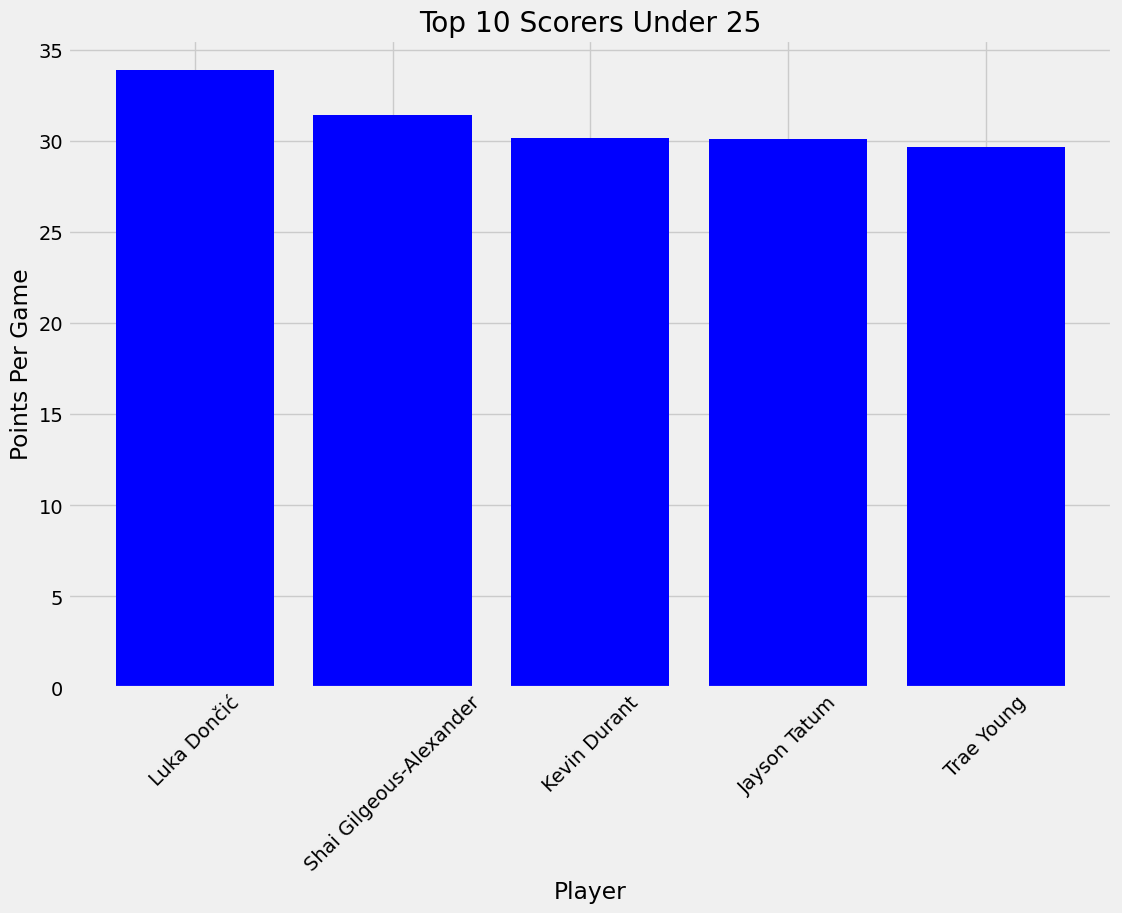

In [7]:
# isolate years to 2010-2024
nba_df = nba_df[nba_df['season_x'] >= 2010]

# Filter the DataFrame for players under 25
under_25_df = nba_df[nba_df['age'] < 25]

# Sort the filtered DataFrame by 'pts_per_game' in descending order
top_scorers_under_25 = under_25_df.sort_values(by='pts_per_game', ascending=False).head(10)

# Create a bar plot for the top 10 scorers under 25
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
plt.bar(top_scorers_under_25['player_x'], top_scorers_under_25['pts_per_game'], color='blue')
plt.xlabel('Player')
plt.ylabel('Points Per Game')
plt.title('Top 10 Scorers Under 25')
plt.xticks(rotation=45)
plt.show()

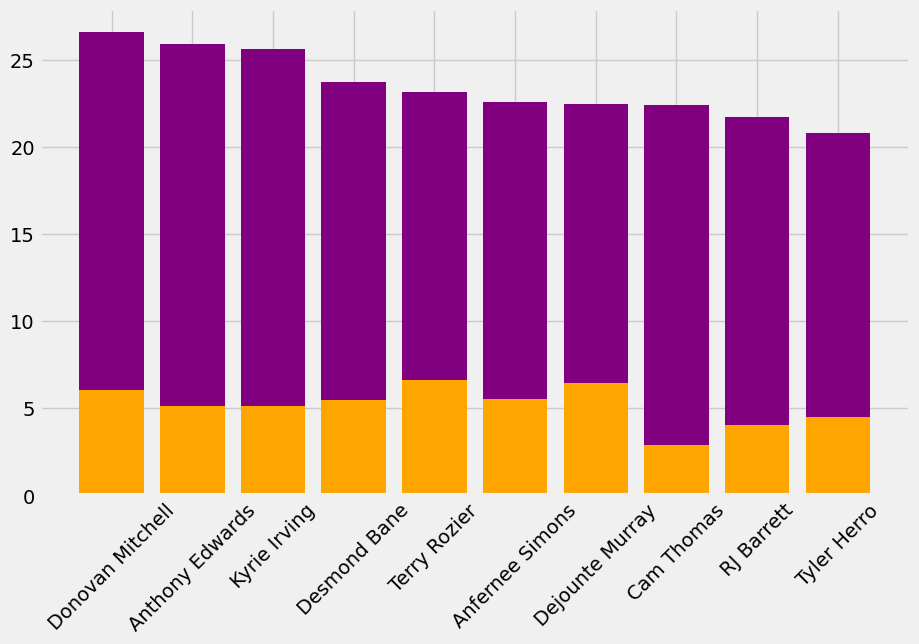

In [14]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('fivethirtyeight')

# Create a bar plot of 'usg_percent' for the top 10 shooting guards by points per game
plt.bar(SG_bypts['player_x'][:10], SG_bypts['pts_per_game'][:10], color='purple')
plt.bar(SG_bypts['player_x'][:10], SG_bypts['ast_per_game'][:10], color='orange')
plt.xticks(rotation=45)
plt.show()

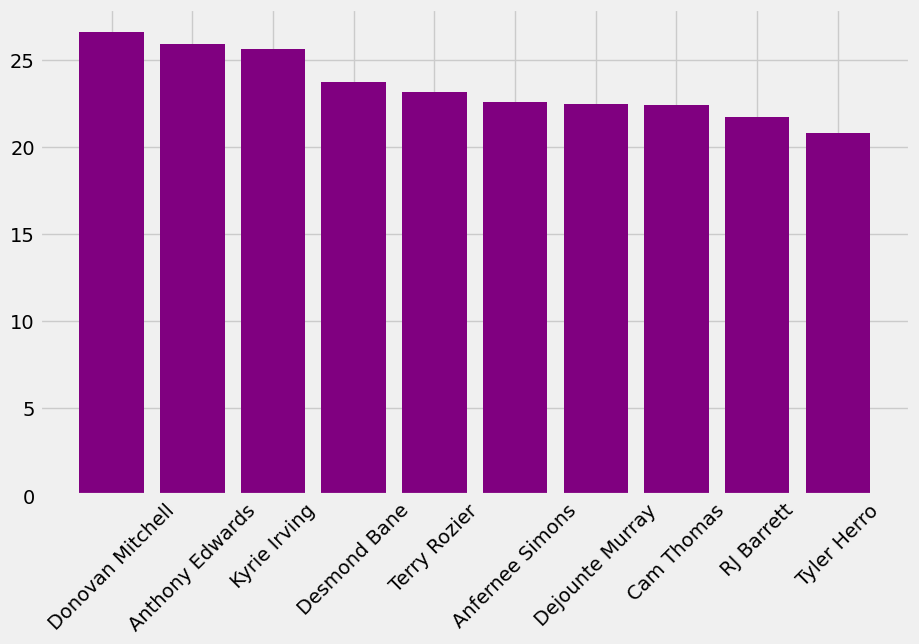

In [15]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('fivethirtyeight')

# Create a bar plot of 'usg_percent' for the top 10 shooting guards by points per game
plt.bar(SG_bypts['player_x'][:10], SG_bypts['pts_per_game'][:10], color='purple')
plt.xticks(rotation=45)
plt.show()

In [16]:
def create_and_sort_df(position):
    # Filter the DataFrame for the given position
    pos_df = nba_df[nba_df['pos'] == position]
    
    # Sort the filtered DataFrame by 'pts_per_game' in descending order
    sorted_df = pos_df.sort_values(by='pts_per_game', ascending=False)
    
    return sorted_df

# Example usage for each position
pure_positions = nba_df['pos'].drop(['PG-SG', 'SF-SG', 'SG-SF', 'PF-C', 'C-PF'], axis=0)
positions = pure_positions.unique()
sorted_dfs = {pos: create_and_sort_df(pos) for pos in positions}

# Display the sorted DataFrame for a specific position, e.g., 'SG'
sorted_dfs['PF'].head()


KeyError: "['PG-SG', 'SF-SG', 'SG-SF', 'PF-C', 'C-PF'] not found in axis"

NameError: name 'sorted_dfs' is not defined

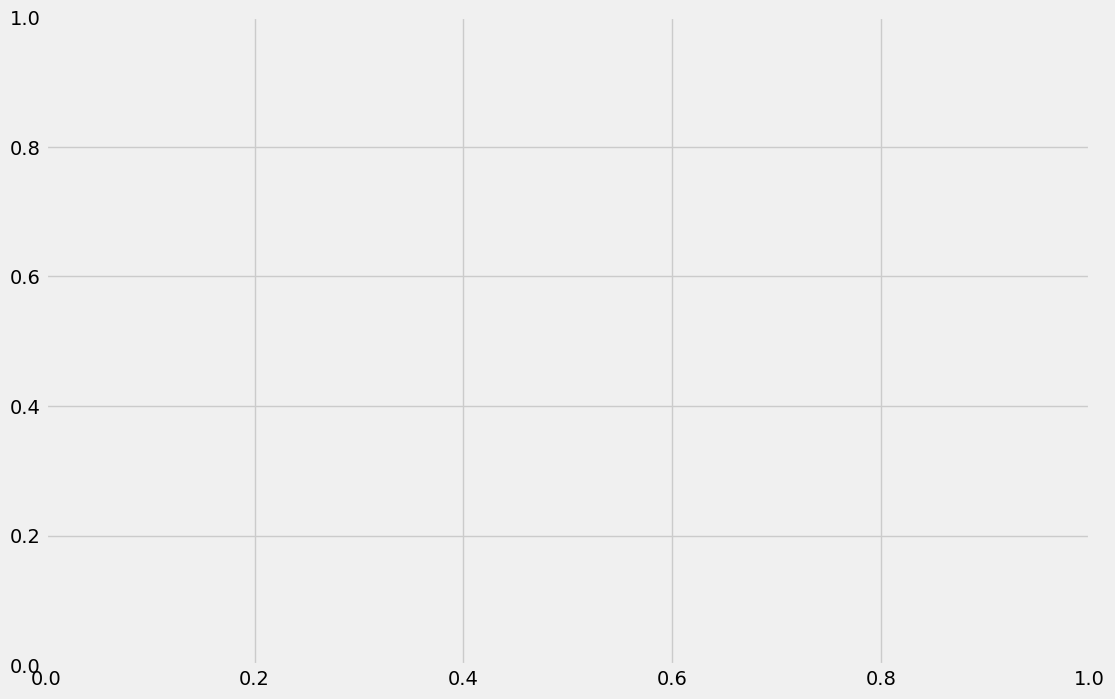

In [9]:
# for each position, create a grouped bar plot of the top 10 players by points per game vs. assists per game vs. rebounds per game
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use('fivethirtyeight')

# Create a grouped bar plot for each position
for pos, df in sorted_dfs.items():
    ax.bar(df['player_x'][:10], df['pts_per_game'][:10], label='Points Per Game')
    ax.bar(df['player_x'][:10], df['ast_per_game'][:10], label='Assists Per Game')
    ax.bar(df['player_x'][:10], df['trb_per_game'][:10], label='Rebounds Per Game')
    



    



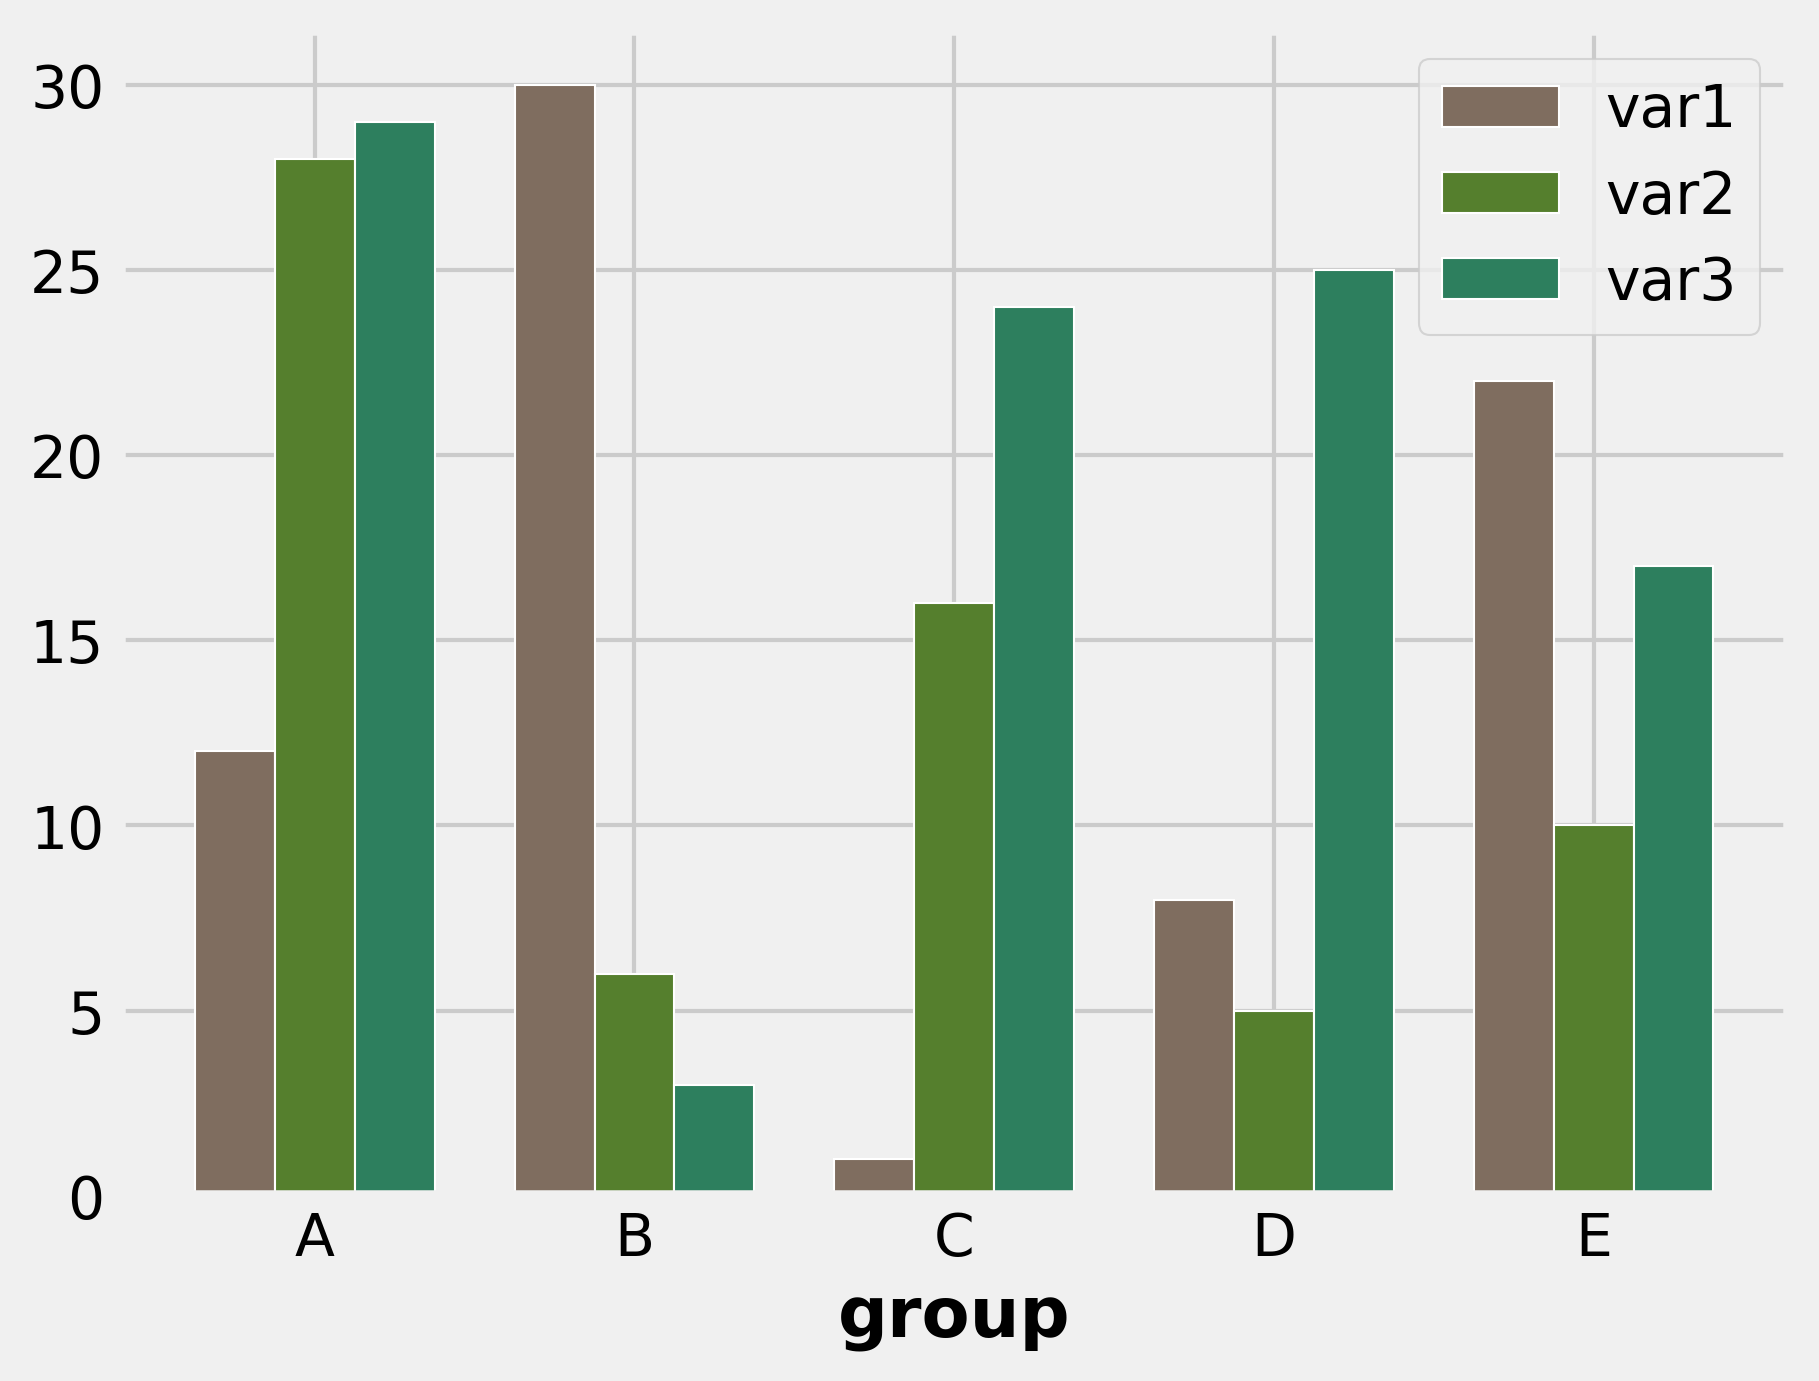

In [17]:
### Adding template code for a grouped bar plot courtesy of Yan Holtz's [Python Charts Gallery](https://python-graph-gallery.com/11-grouped-barplot/) ###
import numpy as np
import matplotlib.pyplot as plt

# Data
barWidth = 0.25
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]

# Bar positions
r = np.arange(len(bars1))
r2 = r + barWidth
r3 = r2 + barWidth

# Plotting
fig, ax = plt.subplots(dpi=300)
ax.bar(r, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
ax.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')

# Xticks
ax.set_xlabel('group', fontweight='bold')
ax.set_xticks(r + barWidth)
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'])

# Legend and show
ax.legend()
plt.show()

